# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':12,
    'stickiness_wi':2000,
    'stickiness_bt':13.5, # 100
    'sparsity':1,
    'pvar': 0.5,
    'lrate':1,
    'lratep':1,
    'decay_rate':0.9995,
} 
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_12.000-stickiness_wi_2000.000-stickiness_bt_13.500-sparsity_1.000-pvar_0.500-lrate_1.000-lratep_1.000-decay_rate_1.000-beta2_0.000'

### main

In [5]:
ns = 15
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [6]:
## accuracy
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([1.        , 0.47869575, 1.        , 0.47465734, 0.50750534])

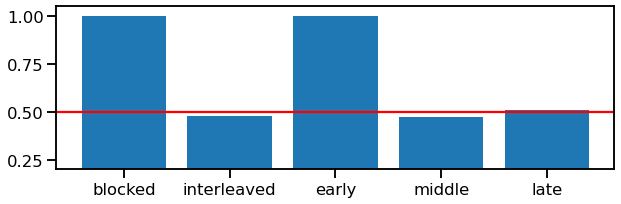

In [7]:
plt.figure(figsize=(10,3))
plt.bar(condL,test_acc)
plt.ylim(0.2,1.05)
plt.axhline(0.5,c='r')

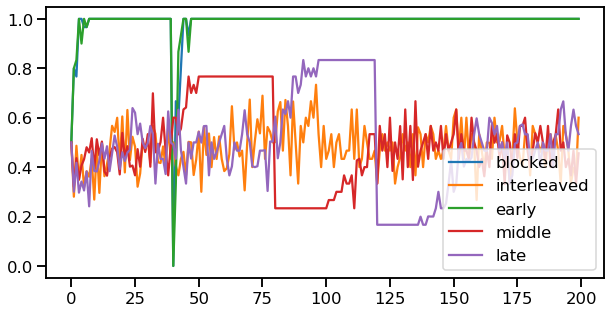

In [8]:
plt.figure(figsize=(10,5))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()

<BarContainer object of 5 artists>

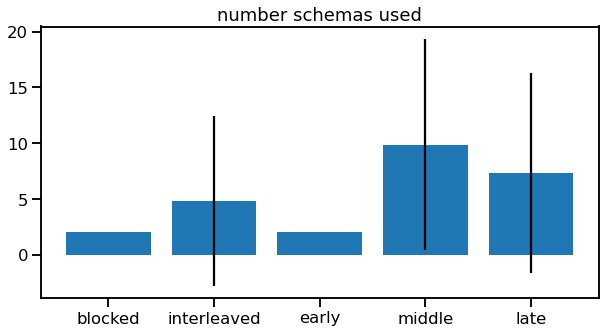

In [9]:
## count number of schemas used
def count_num_schemas(exp_data):
  """ 
  """
  L = []
  for curr_idx in range(5):
    num_schemas_used = [
      len(np.unique(exp_data[curr_idx][i]['zt'][:,:-1].flatten())
         ) for i in range(ns)
    ]
    L.append(num_schemas_used)
  nschemas = np.array(L)
  return nschemas


nschemas = count_num_schemas(exp_batch_data)
M = nschemas.mean(1)
S = nschemas.std(1)
plt.figure(figsize=(10,5))
plt.title('number schemas used')
plt.bar(condL,M,yerr=S)

# model state

In [10]:
curr_idx = 0
seed_idx = 0

In [11]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [12]:
tstep = 3
sch = 0
priors[:,tstep,sch]


array([2004., 2008., 2012., 2016., 2020., 2024., 2028., 2032., 2036.,
       2040., 2044., 2048., 2052., 2056., 2060., 2064., 2068., 2072.,
       2076., 2080., 2084., 2088., 2092., 2096., 2100., 2104., 2108.,
       2112., 2116., 2120., 2124., 2128., 2132., 2136., 2140., 2144.,
       2148., 2152., 2156., 2160.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161., 2164.,
       2168., 2172., 2176., 2180., 2184., 2188., 2192., 2196., 2200.,
       2204., 2208., 2212., 2216., 2220., 2224., 2228., 2232., 2236.,
       2240., 2244., 2248., 2252., 2256., 2260., 2264., 2268., 2272.,
       2276., 2280., 2284., 2288., 2292., 2296., 2300., 2304., 2308.,
       2312., 2316., 2320.,  321.,  321.,  321.,  321.,  321.,  321.,
        321.,  321.,